<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Игорь! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента</h3> 
Привет проверяющий! 
    У меня получилась точность дерева решений 1, поэтому не могу нормально оценить данное исследование, где-то ошибся =(
    </div>  

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Разберемся )
</div>


## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
  
    
    
- Все-таки стоит импорт библиотек и выгрузку данных разнести в разные ячейки, так стилистически более правильно.
    
    
- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html) 


имеем 3214 строк без нулевых значений

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.


<div class="alert alert-warning">



Совет: 

Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это важная информация при моделировании и помогло бы решить бонусное задание сразу.  Тут можно [почитать](https://dyakonov.org/2021/05/27/imbalance/) дополнительно зачем мы обращаем внимание на это




</div>


## Разбейте данные на выборки

разделяю ДФ на три выборки тренировочная, валидная, тестовая в соотношении 2:1:1. Целевой признак столбец 'is_ultra'

In [4]:
features = df.drop('is_ultra',axis = 1)
target = df['is_ultra'] 

In [5]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.5, random_state=12345, stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [6]:
features_train.shape

(1607, 4)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!


<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым


- После разбиения лучше перестраховаться и использовать .shape, для контроля за корректностью разбиения



</div>





<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 

-Надеюсь правильно использовал stratify
    
-Для каждлго ДФ shape писать?
    </div> 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:


Только использовать его надо для обоих сплитов и shape для всех
</div>



## Исследуйте модели

In [7]:
best_model = None
best_result = 0

случайный лес

In [8]:
%%time
for est in range(1, 50):
    for depth in range (1,10,1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth) # обучите модель с заданным количеством деревьев
        model.fit(features_train,target_train) # обучите модель на тренировочной выборке
        result = model.score(features_valid,target_valid) # посчитайте качество модели на валидационной выборке
        if result > best_result:
            best_model = model# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных

CPU times: user 21.8 s, sys: 167 ms, total: 22 s
Wall time: 22 s


In [9]:
best_result

0.8156911581569116


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Верно. 

<div class="alert alert-warning">

Совет:


- Можно было сделать похитрее - добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
    
    
- А еще можно вместо цикла использовать sklearn-ий встроенный функционал GridSearch. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_.  Если есть время можешь сразу попробовать.

  
 
- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))  А еще есть tqdm, показывает на каком этапе у нас работа в цикле происходит




</div>


<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
    
- Добавил второй гиперпараметр по глубине дерева, забегая вперед глубина 9 и деревьев 19 лучшая модель.
    
- GridSearch выглядит совсем жестким =)
    
- Почитал в интернете по поводу tqdm и чет совсем не понял как его использовать, циклы какие-то пишут для него
    </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍
    
    
tqdm - для циклов    
    
</div>



логистическая регрессия

In [10]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train,target_train) 
result = model.score(features_valid, target_valid)
print(result)
if result > best_result:
    best_model = model# сохраните наилучшую модель
    best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных

0.7397260273972602


In [11]:
best_result

0.8156911581569116

дерево решений

In [12]:
for depth in range(1,6,1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева
    model.fit(features_train,target_train) # обучите модель
    predictions_valid = model.predict(features_valid)
    result = model.score(features_valid,target_valid)
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- Ты  
    
    accuracy_score
    
которая функция, переназначил, теперь это переменная    
    
    
    
- model.score не то подаешь.     
</div>


<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Подправил все. Слушай, а в чем разница между *model.score* и *accuracy_score*?
    </div>  

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

По результатам никакой разницы
</div>


In [13]:
best_result

0.8156911581569116

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
В остальном работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле




<div class="alert alert-warning">


Совет: 



- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении гиперпараметров меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение



- tree_plot можно построить, глянуть как DT сплиты делает, будет понимание как моджель принимает решения. 

</div>



<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
    
- Метрики - имеешь в виду точность (result)? По итогу у меня два списка точности - для валидации и для теста?

- Для каких еще моделей можно строить такие графики? Для RF выдавал ошибку

</div> 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:

Да. По валидации и train.
    
Добавляешь (схема):
    
    
    predictions_train = model.predict(features_train)
    result_train = accuracy_score(target_train, predictions_train)

    
а теперь собираешь в цикле  result_train и result в список, и строишь по ним обычный график plt.plot()
    
    
    
Для всех моделей можно строить такой график    

</div>


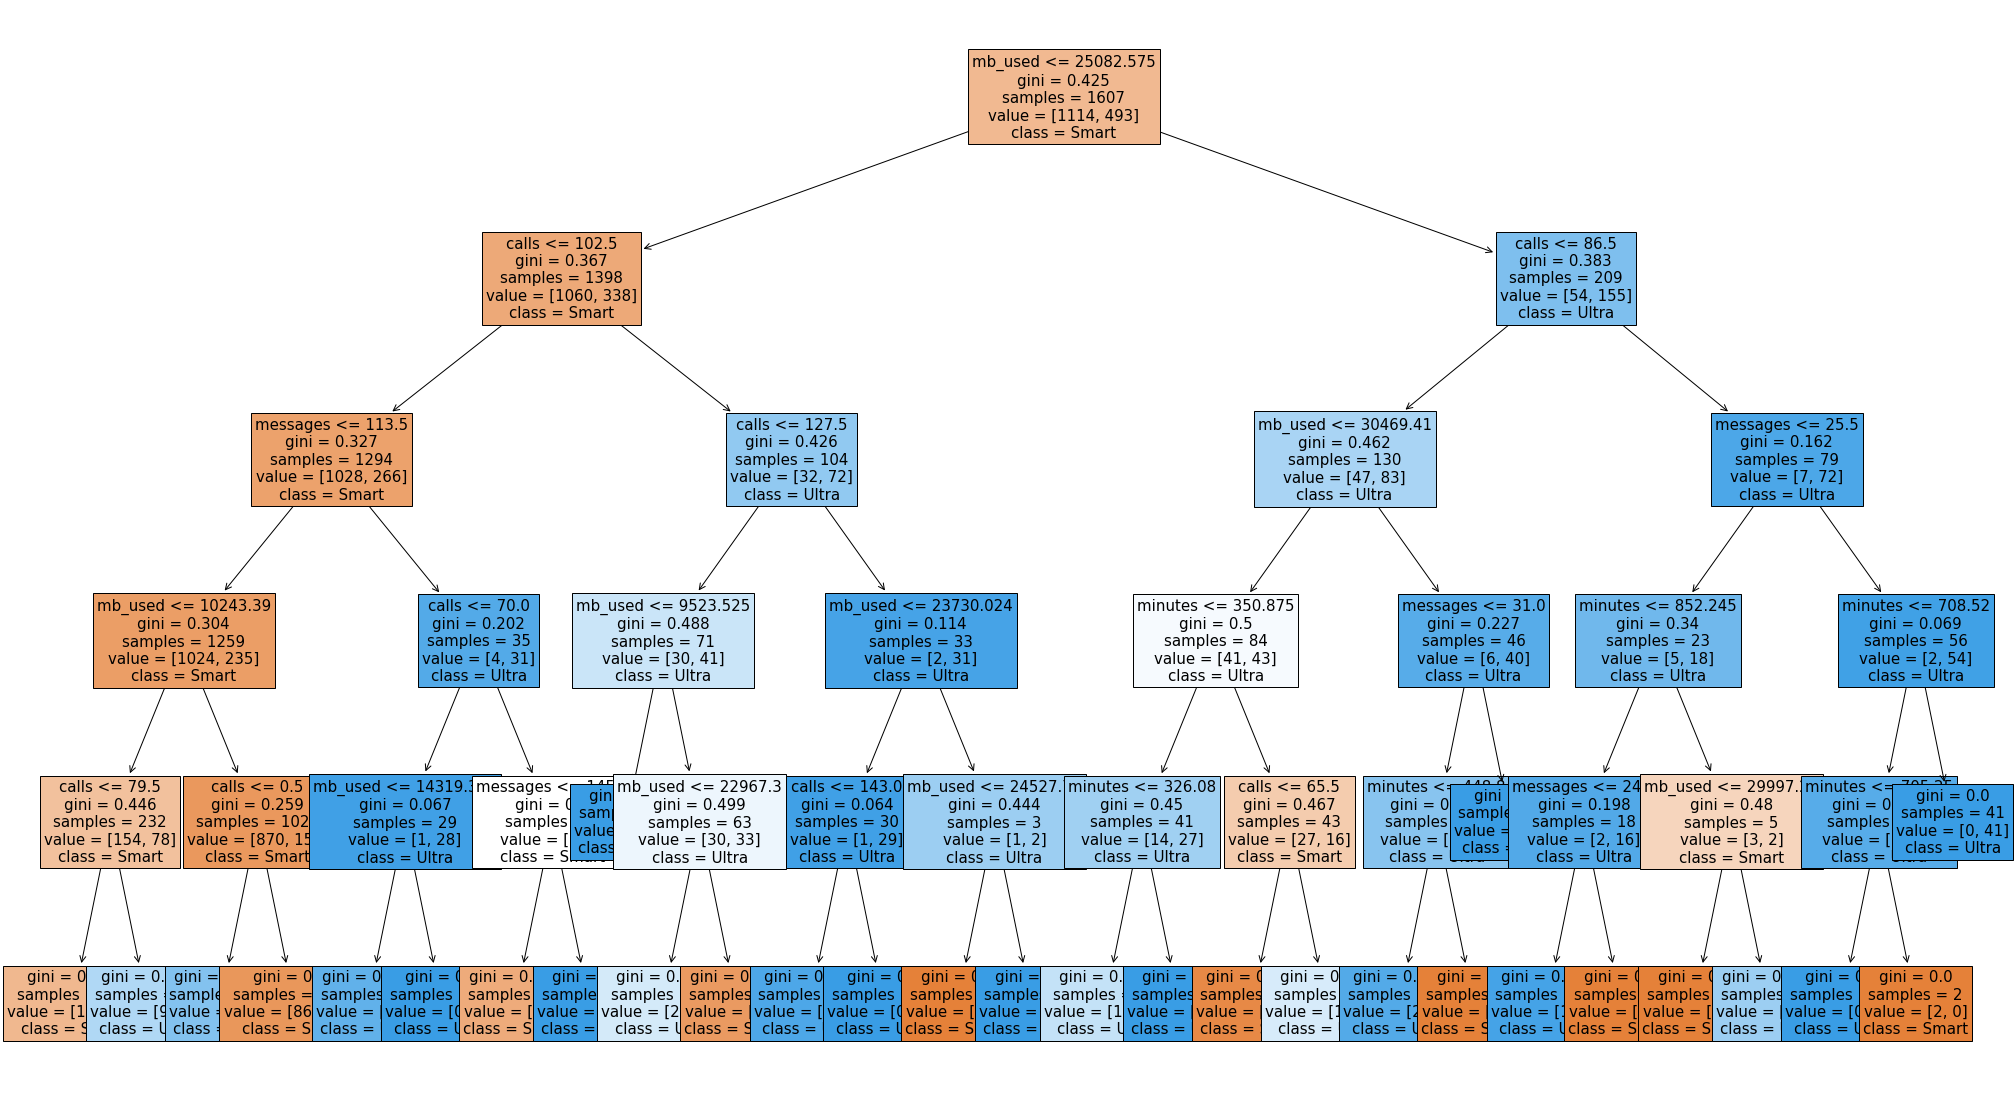

In [14]:
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(model, 
               feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15)

<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Не могу понять, почему размер графика не меняется, ничего не видно
    </div> 




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:


    
Так красивей (схема)
    
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(35,20))
    _ = tree.plot_tree(your_model, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15)
 

</div>


  

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

На самом деле DT вообще не используют, это слабая модель, а RF одна из лучших в классическом ML. Почему у тебя так получилось?! Значит просто не "дожата" RF, можно было подольше поучиться, использовать перебор по большему числу гиперпараметров.  



Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Дожал RF и он стал наилучшей моделей.
    
- Может это связано с переобучением? На второй вопрос вообще не представляю как ответить.

- RF это же совокупность деревьев. Например 10 деревьев с грубиной 5 и из этих он выбирает лучшее.

- Эм, хороший вопрос. Я почитал и вменяемого ответа не нашел)

- Потому что там мало параметров и не получается все выучить?

</div>  

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. На train точность ростет вплоть до 100%. 
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [15]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=19, random_state=12345)

In [16]:
best_result

0.8156911581569116

In [17]:
result = model.score(features_test, target_test)
result

0.7960199004975125

<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Во, уже меньше единицы)
    </div> 

и здесь точность 1, точно где-то косяк


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки на валидации) отобранную на валидации. 



<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 




- В качестве бонуса можешь вывести еще несколько метрик своей модели - precision, recall, F1 и confussion matrix) Все есть в sklearn)




</div>



<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Дожал RF и он стал наилучшей моделей.
    
- Может это связано с переобучением? На второй вопрос вообще не представляю как ответить.

- Учитая, что наша задача состоит в том чтобы обучить модель по предсказанию использования тарифа Ultra. То используя данную информацию предлагать пользователям перейти на данный тариф, что будет более выгодно для компании.

- Марат, эти метрики у нас в следущем цикле по плану.

</div>  

## (бонус) Проверьте модели на адекватность

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
predictions_test = [0]*target_test.shape[0]
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_train)
dummy_clf.score(features_train,target_train)

0.6932171748599876

честно говоря, не понял как использовать дамми класификацию

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:
    
    
Не то подаешь в 
    
    dummy_clf.fit
    
    
Должно получиться 0,69    

</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
И в чем смысл этой проверки? Мол даже если эта модель дает 0.69, наша должна быть значительнее лучше?
    </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Именно. У нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядело бы  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_valid)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    

<div>


## Вывод:

- Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
- В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 
___
- По представленным данным было обучено три модели _RandomForestClassifier, LogisticRegression, DecisionTreeClassifier_ и выбрана лучшая из них - **RandomForestClassifier** с количеством деревьев 19 и глубиной 9. Точность данной модели на валидационной выборке - **0.815**
___
- Точность на тестовой выборке - **0.796**. Что удовлетворяет условию точности не меньше **0.75**


<div class="alert alert-info"; style="border-left: 7px solid blue">
<h3>✔ Комментарий студента V.1</h3> 
Спасибо за уделенное время, Марат! Такой вывод пойдет или что-то еще необходимо дописать?
    </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Спасибо за работу.
    
    
Вполне достаточно
</div>


## Чек-лист готовности проекта


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Игорь, ты старательно выполнил работу, все четко, осмысленно. Выводы присутствуют. Вижу у тебя получается в ML,  дальше будет интересней )  


С комментированием кода тоже никаких проблем нет, твоих объяснений достаточно для понимания коллегами хода твоих мыслей. 

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 

- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- посоветовал посмотреть в сторону GridSearchCV
- как можно улучшить результаты 

Замечания на будущее:
    

- Было бы замечательно, в выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
Обязательное к исправлению:


- переназначил функцию 
    
    
    
- не то подал в model.score    


    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай )     
</div>






<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>



    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и ты узналА что то новое, а проект стал лучше, и симпатичней.



Отличная работа. Желаю успехов в дальнейшей учебе!




    
</div>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
